In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


from ast import literal_eval
import chess

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

from util.utils import run_experiment_multi_seed, runner_results_to_stats, plot_fitness_iteration, get_optimal_hyperparameters
from util.utils import plot_fitness_vs_hyperparameter, plot_HP_heatmap, plot_fitness_fevals

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

import time


%load_ext autoreload
%autoreload 2

# Fixed random seed for reproducibility on random optimization problems
FIXED_SEED = 42
np.random.seed(FIXED_SEED)
# Random Seeds for reproducibility
RANDOM_SEEDS = [1, 2, 3, 4, 5]

/tmp/ipykernel_4758/3686309409.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


# 1. Initialization of the problems
There will be three subproblems per RO problem with increasing difficulty. For TSP, difficulty is increasing as the number of cities increases.<br>
We define the subproblems as follows:
1. **Easy**: &emsp;&emsp;&ensp; $n_{cities} = 10$
2. **Medium**:&emsp; $n_{cities} = 20$
3. **Hard**: &emsp;&emsp;&ensp;$n_{cities} = 30$

Each problem will be solved using the following algorithms:
1. **Hill Climbing with Random Restarts (RHC)**
2. **Simulated Annealing (SA)**
3. **Genetic Algorithm (GA)**
4. **MIMIC**

For each algorithm, we will run the random optimization algorithm with a set of random seeds to mitigate the effect of lucky and unlucky runs.

In [2]:
# Initialization of the TSP problems
problem_easy = TSPGenerator().generate(seed=FIXED_SEED, number_of_cities=10, maximize=True)
problem_medium = TSPGenerator().generate(seed=FIXED_SEED, number_of_cities=20, maximize=True)
problem_hard = TSPGenerator().generate(seed=FIXED_SEED, number_of_cities=30, maximize=True)

# 2. Random Optimization of Traveling Salesman Problem
The Traveling Salesman Problem (TSP) is a classic optimization problem where the goal is to find the shortest tour of a set of cities. The TSP is NP-hard, meaning that there is no known polynomial-time solution for it. We will solve the TSP using the Randomized Optimization Algorithms (ROAs) mentioned above.For stability and reproducibility, we will use a fixed set of random seeds for each problem and algorithm<br><br>

We expect that the best algorithm for TSP will be GA or MIMIC, as they are designed to solve combinatorial optimization problems. However, we will also test the other algorithms to see how they perform on this problem.

## 2.1 RHC
The Randomized Hill Climbing (RHC) algorithm is a simple optimization algorithm that works by iteratively moving from the current solution to a neighboring solution. The algorithm is called "randomized" because it chooses a random neighbor at each iteration. The algorithm is also called "hill climbing" because it always moves to the neighbor that improves the objective function value. The algorithm is simple and easy to implement, but it is not guaranteed to find the global optimum, especially for non-convex problems like the TSP.

In [9]:
rhc = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[0],
                max_attempts=10000,
                )

rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
# rhc_results = rhc.run()
# rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
# plot the mean and std of the fitness with nice plots
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP", x_axis="Iteration")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

In [ ]:
# print the maximum Time
print(f'Best Time: {rhc_mean["Time"].max()}')

Best Time: 1.5358146063999925


In [ ]:
rhc = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[10],
                max_attempts=300,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
start = time.time()
rhc_results = rhc.run()
end = time.time()
# print the time it took to run the experiment in seconds
print(end - start)

Experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Experiments: 100%|██████████| 1/1 [00:48<00:00, 48.22s/it]

48.240034103393555


In [ ]:
rhc_results = [rhc_results]
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)

<Figure size 640x480 with 0 Axes>

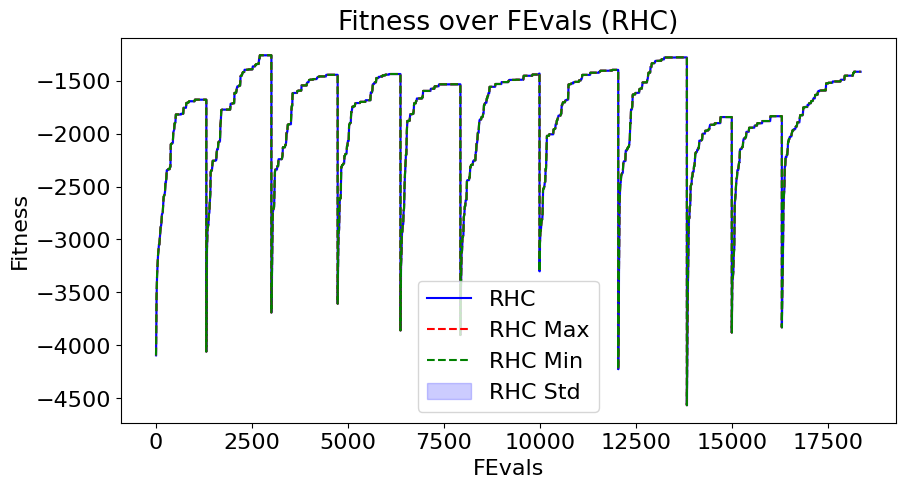

Best Fitness: -1257.613112464358


In [ ]:
# plot the mean and std of the fitness with nice plots
plot_fitness_iteration(rhc_mean, rhc_std, rhc_min, rhc_max, "RHC", "TSP", x_axis="FEvals")
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')

In [ ]:
print(f'Best Fitness: {rhc_mean["Fitness"].max()}')
print(f'Best TIme {rhc_mean["Time"].max()}')
print(f'Best FEvals {rhc_mean["FEvals"].max()}')

Best Fitness: -1257.613112464358
Best TIme 48.192485167000086
Best FEvals 18355.0


In [ ]:
rhc = RHCRunner(
                problem=problem_hard,
                experiment_name='rhc',
                output_directory=None,
                seed=FIXED_SEED,
                iteration_list= np.arange(0, 2000, 10),
                restart_list=[10],
                max_attempts=300,
                )

# rhc_results = run_experiment_multi_seed(rhc, RANDOM_SEEDS)
start = time.time()
rhc_results = rhc.run()
end = time.time()
# print the time it took to run the experiment in seconds
print(end - start)

rhc_results = [rhc_results]
import pickle
with open('experiments/TSP_RHC.pkl', 'wb') as f:
    pickle.dump(rhc_results, f)

Experiments:   0%|          | 0/1 [00:00<?, ?it/s]

Experiments: 100%|██████████| 1/1 [01:01<00:00, 61.28s/it]

61.30278396606445


In [ ]:
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)

## 2.2 Simulated Annealing

In [ ]:
sa = SARunner(problem=problem_easy,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 2000, 10),
              max_attempts=1000,
              temperature_list=[0.1],
              decay_list=[mlrose_hiive.GeomDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)
sa_mean, sa_std, sa_min, sa_max = runner_results_to_stats(sa_results)

<Figure size 640x480 with 0 Axes>

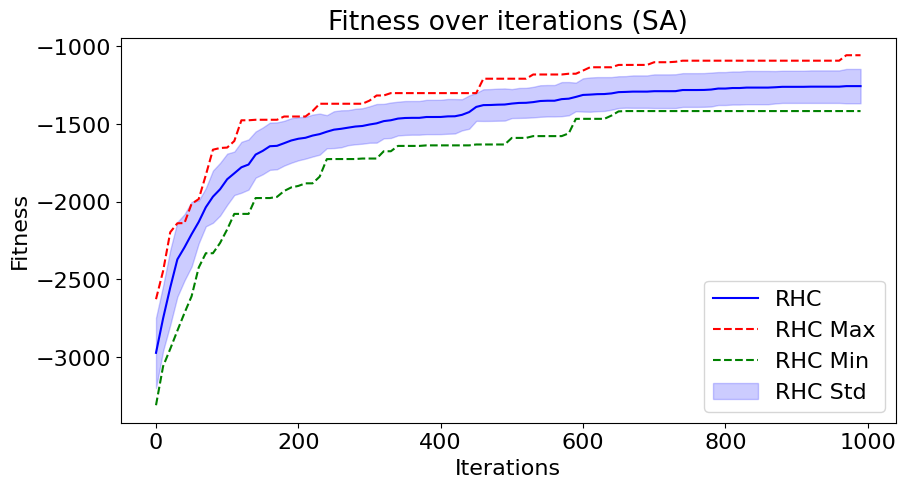

Best Fitness: -1255.9658969568889


In [ ]:
plot_fitness_iteration(sa_mean, sa_std, sa_min, sa_max, "SA", "TSP")
print(f'Best Fitness: {sa_mean["Fitness"].max()}')

## 2.3 Genetic Algorithm

In [ ]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list=np.arange(0, 1000, 10),
              max_attempts=1000,
              population_sizes=[50],
              mutation_rates=[0.05]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

In [ ]:
ga_mean, ga_std, ga_min, ga_max = runner_results_to_stats(ga_results)

<Figure size 640x480 with 0 Axes>

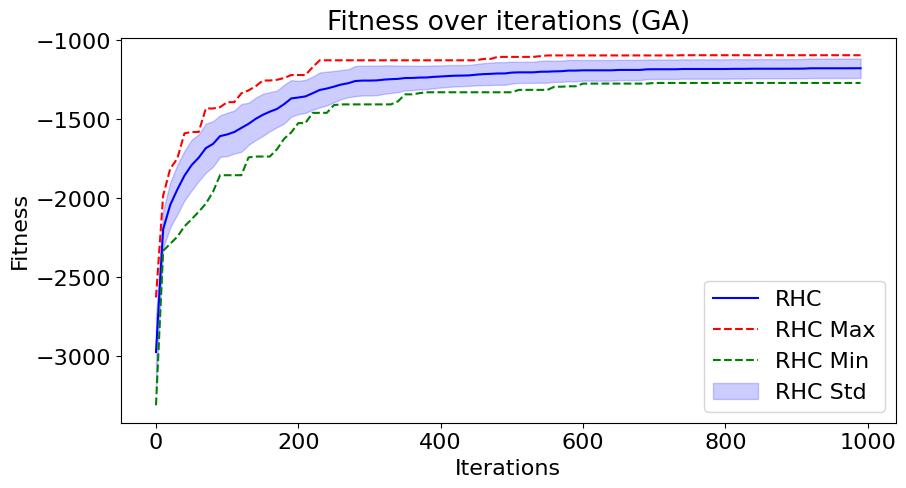

-1176.0630587357605


In [ ]:
plot_fitness_iteration(ga_mean, ga_std, ga_min, ga_max, "GA", "TSP")
print(ga_mean['Fitness'].max())

## 2.4 MIMIC

In [ ]:
mmc = MIMICRunner(problem=problem_medium,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 1),
                    max_attempts=25,
                    population_sizes=[100],
                    keep_percent_list=[0.6],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)
mmc_mean, mmc_std, mmc_min, mmc_max = runner_results_to_stats(mmc_results)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

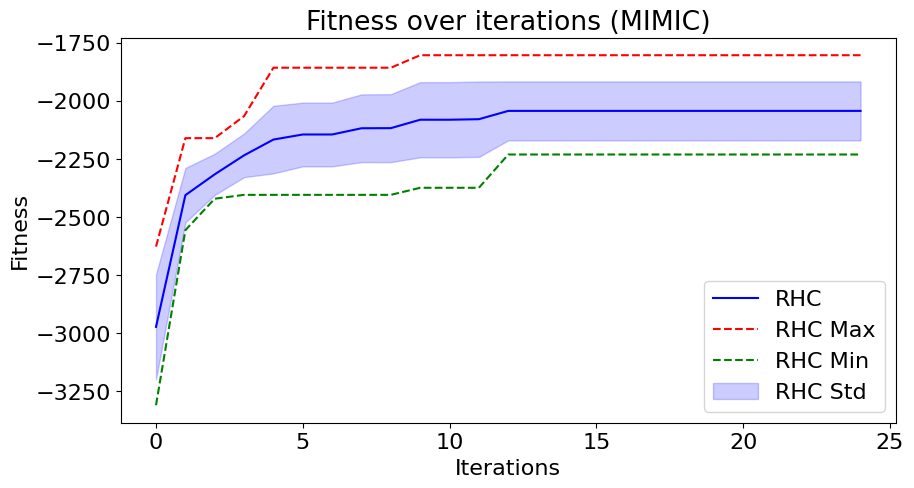

-2043.1222429112458


In [ ]:
plot_fitness_iteration(mmc_mean, mmc_std, mmc_min, mmc_max, "MIMIC", "TSP")
print(mmc_mean['Fitness'].max())

# 3. Hyper-parameter tuning

## 3.1 SA

In [ ]:
sa = SARunner(problem=problem_easy,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(1, 4000, 10), # note: use smaller iteration list for SA
              max_attempts=500,
              temperature_list=[0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0],
              decay_list=[mlrose_hiive.ArithDecay, mlrose_hiive.ExpDecay, mlrose_hiive.GeomDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)
# sa_results = sa.run()
# sa_results = [sa_results]

# Save the results to experiments/TSP_SA_HP using pickle
import pickle
with open('experiments/TSP_SA_HP.pkl', 'wb') as f:
    pickle.dump(sa_results, f)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


In [ ]:
# Load the results from experiments/TSP_SA_HP using pickle
import pickle
with open('experiments/TSP_SA_HP.pkl', 'rb') as f:
    sa_results = pickle.load(f)
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)

In [ ]:
sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
sa_optimal_HP

{'schedule_init_temp': 10.0, 'schedule_type': 'exponential'}

Best Fitness Avg: -666.28004275144
Best Fitness MAX: -664.9617902393335
Best Iteration: 895.0
Best Time: 6.117402751400005
schedule_type
schedule_init_temp = 0.5 Fitness: -687.0568496926903, Time: 0.34027801339998404
schedule_init_temp = 1.0 Fitness: -678.9574118575167, Time: 0.6460222231999978
schedule_init_temp = 2.0 Fitness: -678.9574118575167, Time: 1.949347471999954
schedule_init_temp = 3.0 Fitness: -667.5982952635466, Time: 2.636694302400065
schedule_init_temp = 5.0 Fitness: -670.2348002877595, Time: 6.0585293424001065
schedule_init_temp = 10.0 Fitness: -666.28004275144, Time: 6.117402751400005
schedule_init_temp = 20.0 Fitness: -675.9232965315464, Time: 5.582968749599968


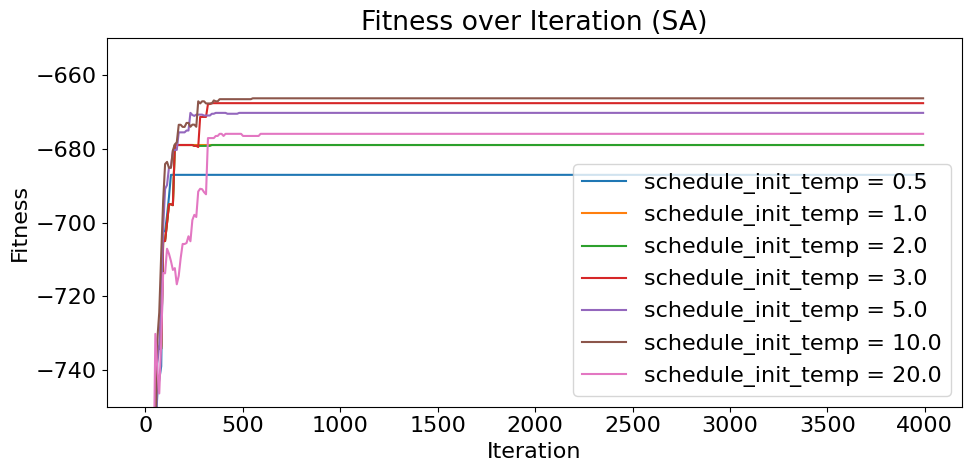

schedule_init_temp
schedule_type = arithmetic Fitness: -666.5188133265672, Time: 32.44153094519997
schedule_type = exponential Fitness: -666.28004275144, Time: 6.117402751400005
schedule_type = geometric Fitness: -667.5982952635466, Time: 4.941525687399917


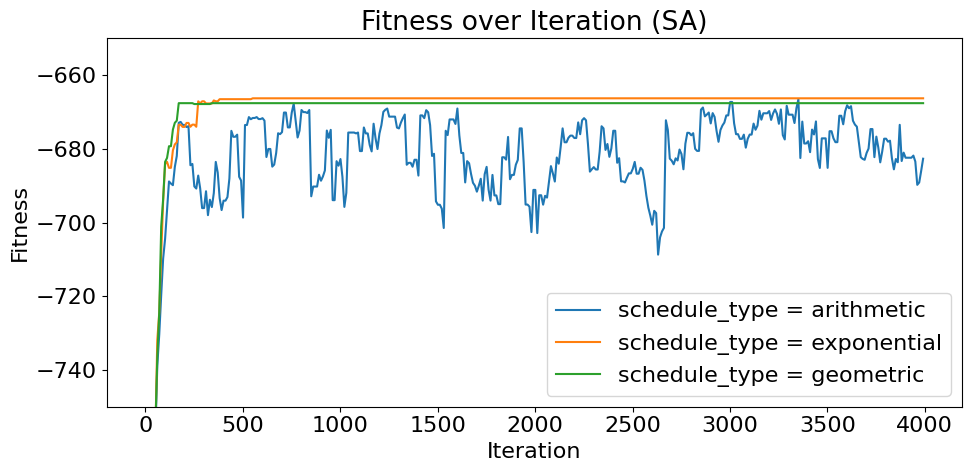

In [ ]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
print(f'Best Time: {best_run["Time"].max()}')
for key in sa_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(sa_hp_mean, sa_hp_std, sa_optimal_HP, key, "SA", "TSP", y_lim=(-750, -650))

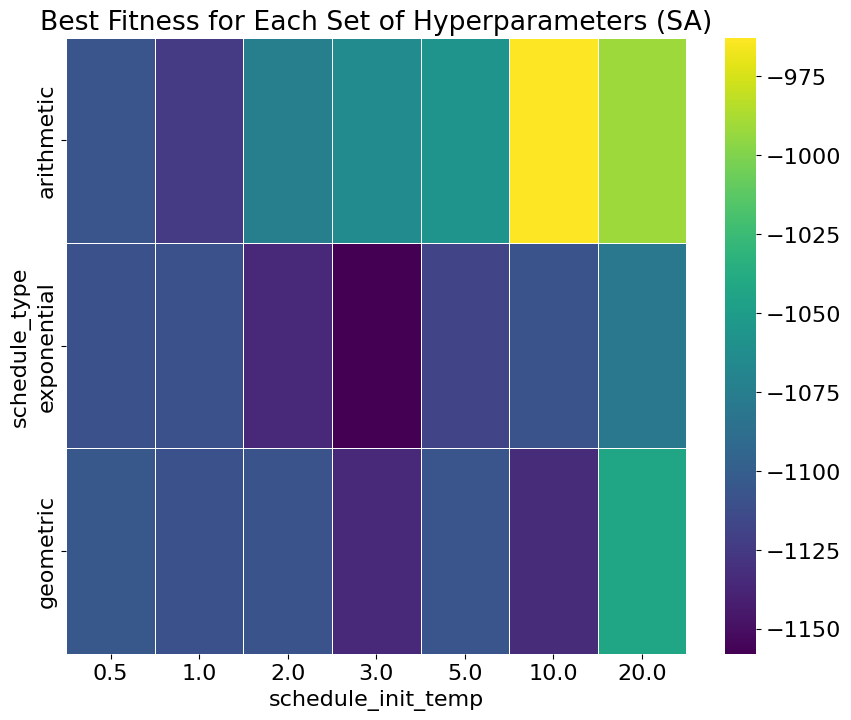

In [ ]:
plot_HP_heatmap(sa_hp_mean, 'schedule_init_temp', 'schedule_type',  "SA", "TSP")

Let's find the sweet spot around 5.0 temp and by increasing the number of iterations.

In [ ]:
sa = SARunner(problem=problem_hard,
              experiment_name='sa',
              output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
              seed=FIXED_SEED,
              iteration_list=np.arange(1, 8000, 10), # note: use smaller iteration list for SA
              max_attempts=500,
              temperature_list=[5.0],
              decay_list=[mlrose_hiive.ArithDecay, mlrose_hiive.ExpDecay, mlrose_hiive.GeomDecay])

# sa = SARunner(problem=problem_hard,
#               experiment_name='sa',
#               output_directory=None, # note: specify an output directory to have results saved to disk "experiments/TSP_SA_HP"
#               seed=FIXED_SEED,
#               iteration_list=np.arange(1, 8000, 10), # note: use smaller iteration list for SA
#               max_attempts=500,
#               temperature_list=[5.0],
#               decay_list=[mlrose_hiive.ArithDecay])

sa_results = run_experiment_multi_seed(sa, RANDOM_SEEDS)
# sa_results = sa.run()
# sa_results = [sa_results]

# Save the results to experiments/TSP_SA_HP using pickle
import pickle
with open('experiments/TSP_SA_HP.pkl', 'wb') as f:
    pickle.dump(sa_results, f)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


Experiments: 100%|██████████| 3/3 [00:38<00:00, 12.86s/it]


In [ ]:
# Load the results from experiments/TSP_SA_HP using pickle
import pickle
with open('experiments/TSP_SA_HP.pkl', 'rb') as f:
    sa_results = pickle.load(f)
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)

sa_optimal_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
sa_optimal_HP


{'schedule_init_temp': 5.0, 'schedule_type': 'arithmetic'}

Best Fitness Avg: -1288.4860405358281
Best Fitness MAX: -1158.0733880736652
Best Iteration: 8048.8
schedule_type
schedule_init_temp = 5.0 Fitness: -1288.4860405358281, Time: 22.19901952800028


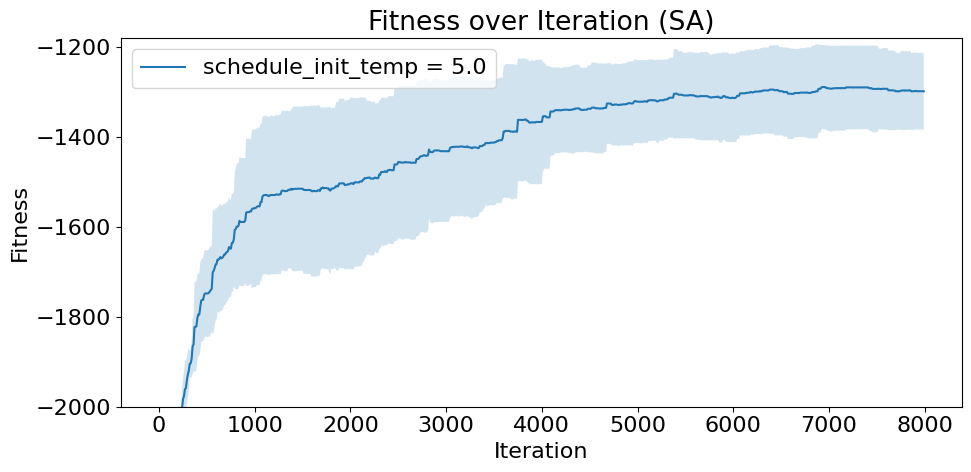

schedule_init_temp
schedule_type = arithmetic Fitness: -1288.4860405358281, Time: 22.19901952800028
schedule_type = exponential Fitness: -1416.3005183151952, Time: 4.94959230479999
schedule_type = geometric Fitness: -1453.4600807771255, Time: 5.102698748000148


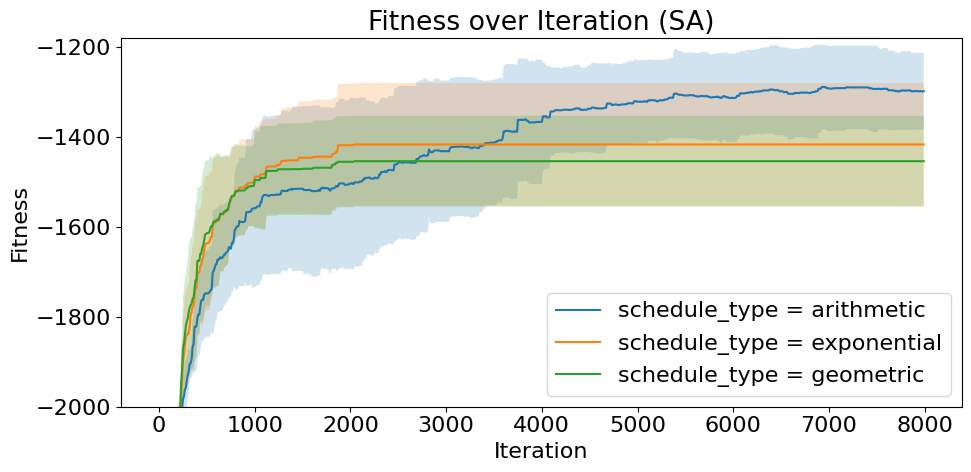

In [ ]:
best_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
best_max = sa_hp_max[(sa_hp_mean['schedule_init_temp'] == sa_optimal_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == sa_optimal_HP['schedule_type'])]
print(f'Best Fitness Avg: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_max["Fitness"].max()}')
print(f'Best Iteration: {best_run["FEvals"].max()}')
for key in sa_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(sa_hp_mean, sa_hp_std, sa_optimal_HP, key, "SA", "TSP", y_lim=(-2000, -1180))

## 3.2 GA

In [15]:
ga = GARunner(problem=problem_medium,
              experiment_name='tsp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=FIXED_SEED,
              iteration_list= np.arange(0, 1000, 10),
              max_attempts=50,
              population_sizes=[700, 900, 1100],
              mutation_rates=[0.05, 0.15, 0.25]
            )

ga_results = run_experiment_multi_seed(ga, RANDOM_SEEDS)

import pickle
with open('experiments/TSP_GA_HP_medium.pkl', 'wb') as f:
    pickle.dump(ga_results, f)

In [16]:
import pickle
with open('experiments/TSP_GA_HP_medium.pkl', 'rb') as f:
    ga_results = pickle.load(f)

ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)

ga_optimal_HP = get_optimal_hyperparameters(ga_hp_mean, ['Mutation Rate', 'Population Size'])


Population Size
Mutation Rate = 0.05 Fitness: -922.9633535457264 (+/- 337.10607378200416), Time: 18.83349076959994
Mutation Rate = 0.15 Fitness: -897.6060563506478 (+/- 337.10607378200416), Time: 26.00561257820018
Mutation Rate = 0.25 Fitness: -927.9934247364323 (+/- 337.10607378200416), Time: 25.739067760000125


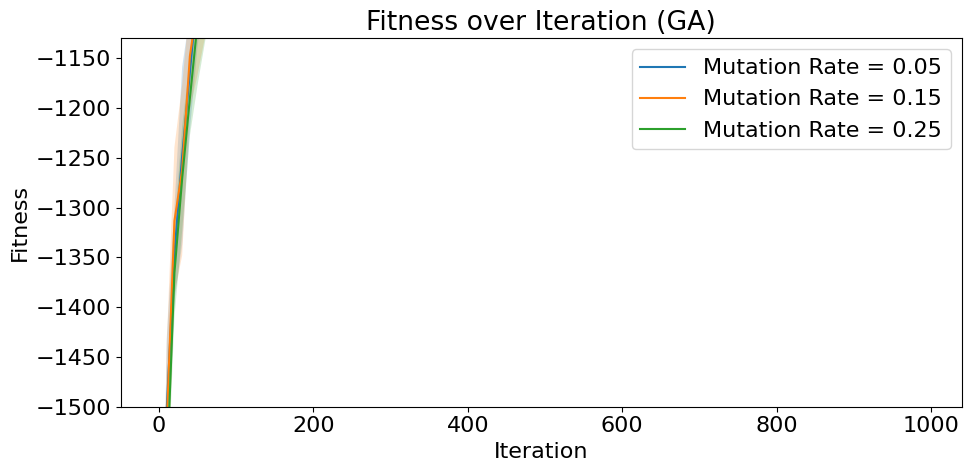

Mutation Rate
Population Size = 700 Fitness: -897.6060563506478 (+/- 337.10607378200416), Time: 26.00561257820018
Population Size = 900 Fitness: -946.9948965086835 (+/- 337.10607378200416), Time: 28.716186676000053
Population Size = 1100 Fitness: -935.7439314731816 (+/- 337.10607378200416), Time: 32.69976663059988


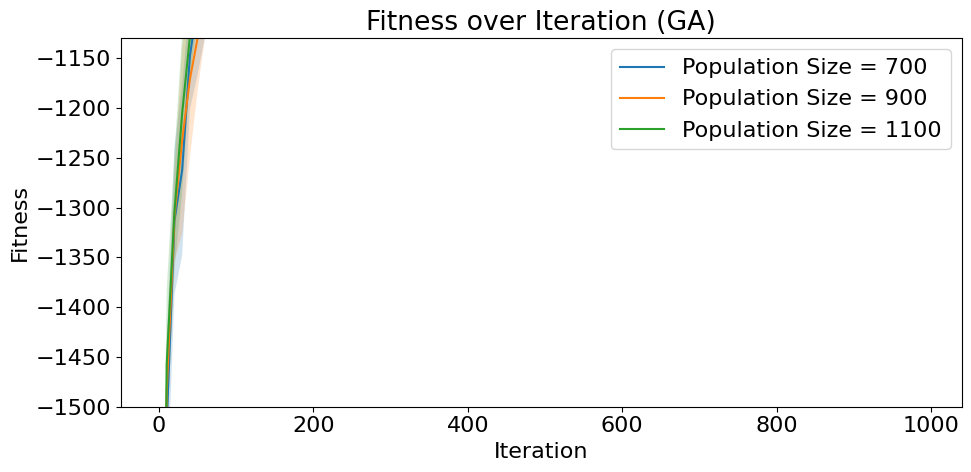

In [17]:
for key in ga_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(ga_hp_mean, ga_hp_std, ga_optimal_HP, key, "GA", "TSP", y_lim=(-1500, -1130))

In [18]:
from util.utils import show_TSP_map
best_run = ga_hp_mean[(ga_hp_mean['Mutation Rate'] == ga_optimal_HP['Mutation Rate']) & (ga_hp_mean['Population Size'] == ga_optimal_HP['Population Size'])]
best_run_max = ga_hp_max[(ga_hp_mean['Mutation Rate'] == ga_optimal_HP['Mutation Rate']) & (ga_hp_mean['Population Size'] == ga_optimal_HP['Population Size'])]
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best Fitness: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_run_max["Fitness"].max()}')
print(f'Best FEvals: {best_run["FEvals"].max()}')


# get best state
best_state = best_run.iloc[-1]['State']
best_state = literal_eval(best_state)
# show_TSP_map(problem_hard, best_state)

Best Time: 26.00561257820018
Best Fitness: -897.6060563506478
Best Fitness MAX: -886.7100467999162
Best FEvals: 159573.8


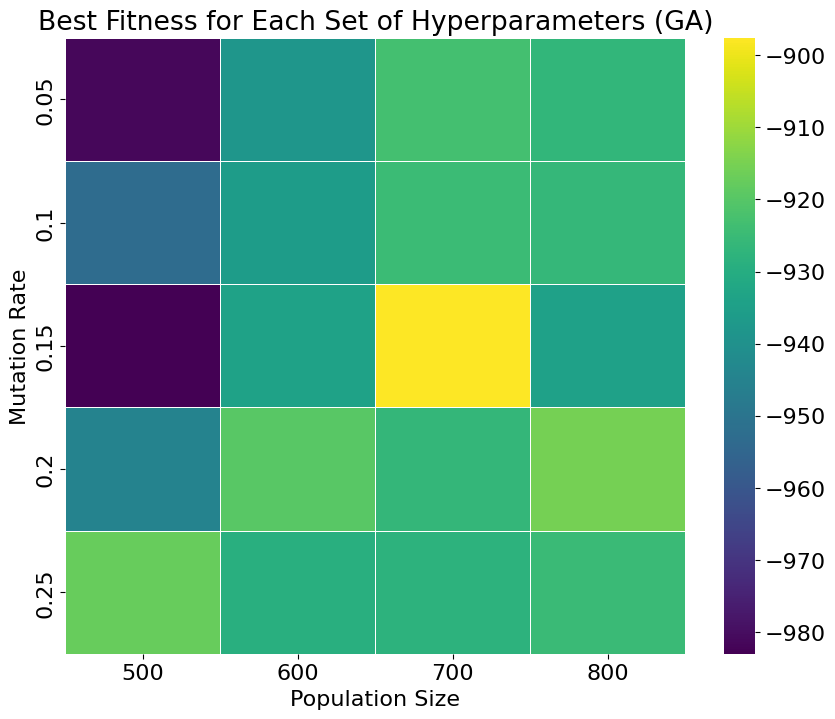

In [ ]:
plot_HP_heatmap(ga_hp_mean, 'Population Size', 'Mutation Rate', 'GA', 'TSP')

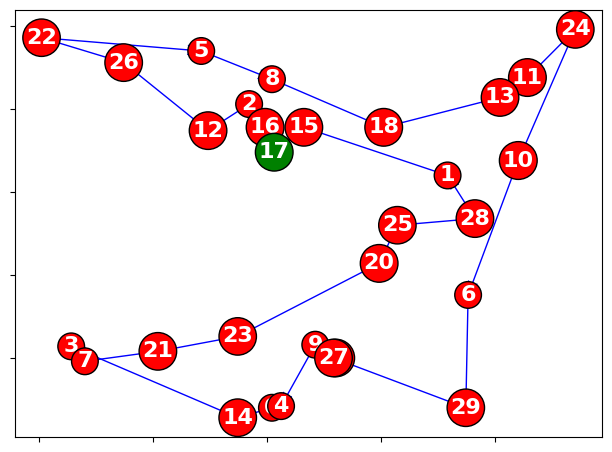

In [14]:
show_TSP_map(problem_hard, best_state)

## 3.3 MIMIC

In [ ]:
mmc = MIMICRunner(problem=problem_hard,
                    experiment_name='tsp_mimic',
                    output_directory=None, # note: specify an output directory to have results saved to disk
                    seed=FIXED_SEED,
                    iteration_list=np.arange(0, 50, 1),
                    max_attempts=25,
                    population_sizes=[10000],
                    keep_percent_list=[0.1],
                    use_fast_mimic=True
                    )

mmc_results = run_experiment_multi_seed(mmc, RANDOM_SEEDS)

import pickle
with open('experiments/TSP_MIMIC_HP.pkl', 'wb') as f:
    pickle.dump(mmc_results, f)

Runner 0 seed: 1
Runner 1 seed: 2
Runner 2 seed: 3
Runner 3 seed: 4
Runner 4 seed: 5


Experiments: 100%|██████████| 1/1 [22:37<00:00, 1357.53s/it]


In [ ]:
import pickle
with open('experiments/TSP_MIMIC_HP.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)

mmc_optimal_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])

Keep Percent
Population Size = 10000 Fitness: -1290.9497855700533, Time: 1191.2579024252016


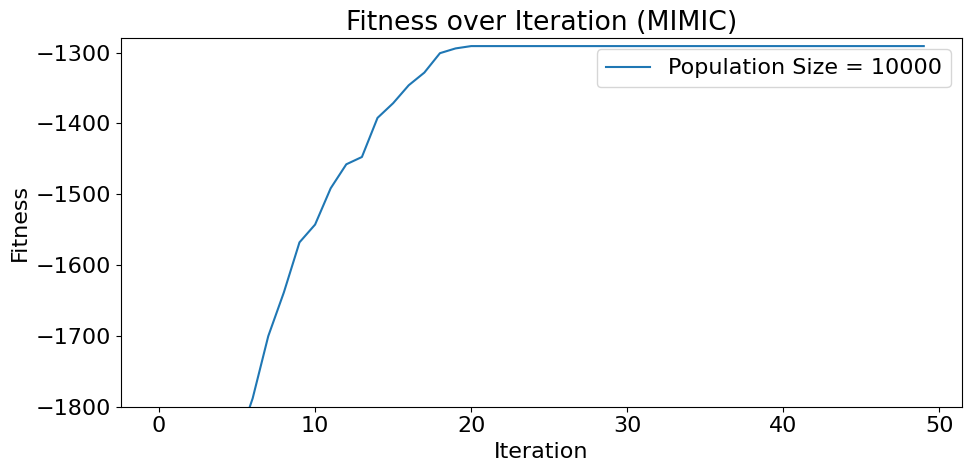

Population Size
Keep Percent = 0.1 Fitness: -1290.9497855700533, Time: 1191.2579024252016


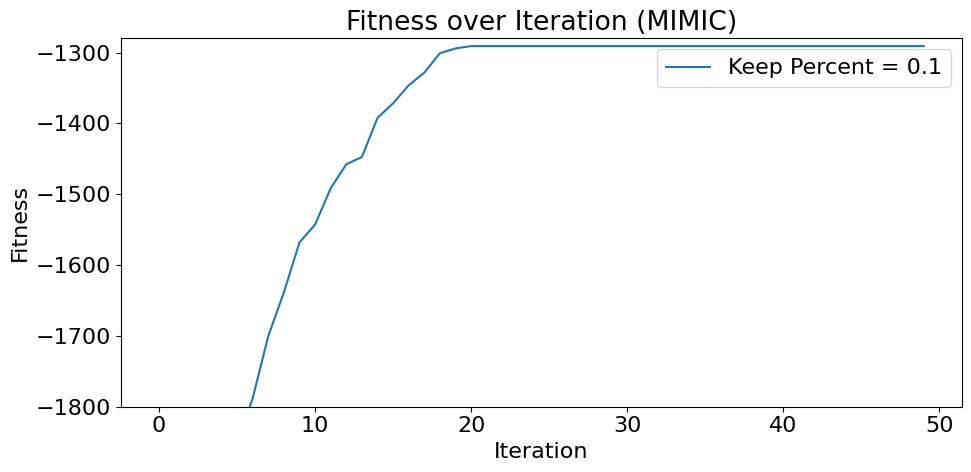

In [ ]:
for key in mmc_optimal_HP.keys():
    plot_fitness_vs_hyperparameter(mmc_hp_mean, mmc_hp_std, mmc_optimal_HP, key, "MIMIC", "TSP", y_lim=(-1800, -1280))

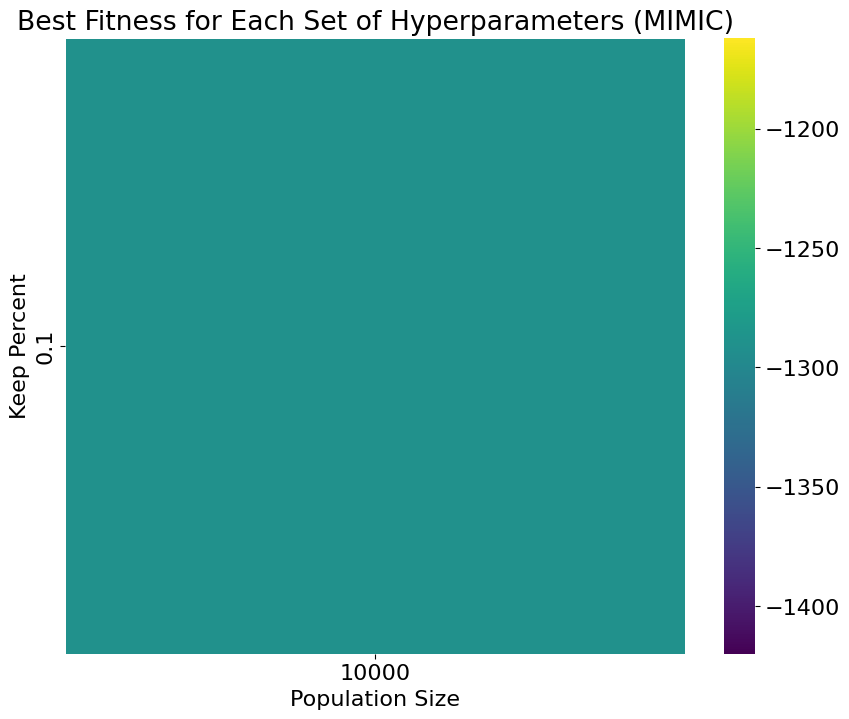

In [ ]:
plot_HP_heatmap(mmc_hp_mean, 'Population Size', 'Keep Percent', 'MIMIC', 'TSP')

In [ ]:
from util.utils import show_TSP_map
best_run = mmc_hp_mean[(mmc_hp_mean['Keep Percent'] == mmc_hp_mean['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_hp_mean['Population Size'])]
best_run_max = mmc_hp_max[(mmc_hp_mean['Keep Percent'] == mmc_hp_mean['Keep Percent']) & (mmc_hp_mean['Population Size'] == mmc_hp_mean['Population Size'])]
print(f'Best Time: {best_run["Time"].max()}')
print(f'Best Fitness: {best_run["Fitness"].max()}')
print(f'Best Fitness MAX: {best_run_max["Fitness"].max()}')
print(f'Best FEvals: {best_run["FEvals"].max()}')


# get best state
best_state = best_run.iloc[-1]['State']
best_state = literal_eval(best_state)
# show_TSP_map(problem_hard, best_state)

Best Time: 1191.2579024252016
Best Fitness: -1290.9497855700533
Best Fitness MAX: -1199.8247262137204
Best FEvals: 438057.8


<Figure size 640x480 with 0 Axes>

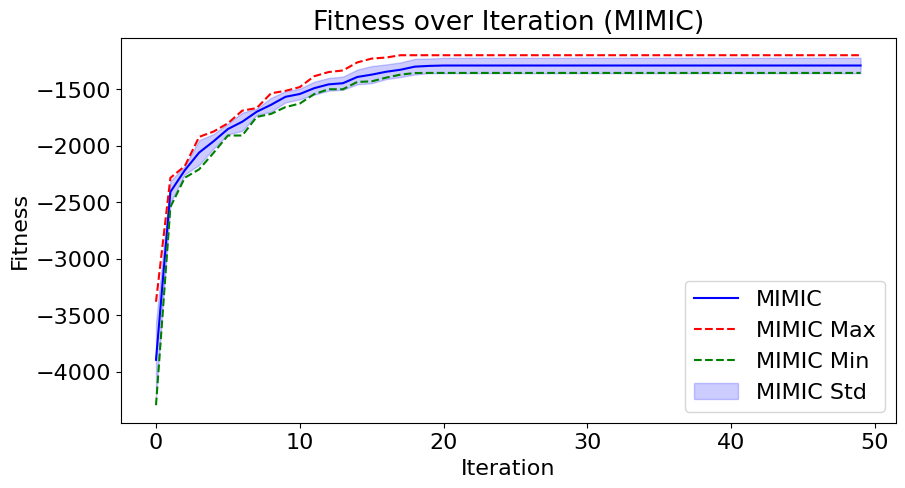

<Figure size 640x480 with 0 Axes>

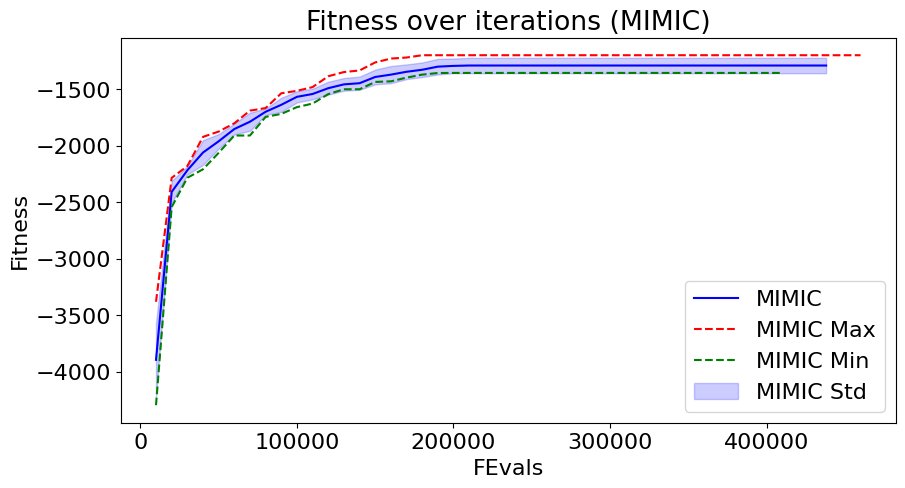

In [ ]:
plot_fitness_iteration(mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max, "MIMIC", "TSP")
plot_fitness_fevals(mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max, "MIMIC", "TSP")

## 3.4 RHC
There is no hyper-parameter to tune for RHC. We will use the default parameters for RHC in our comparison.

# 4. Comparison of Algorithms

In [ ]:
import pickle
# load the results from the experiments
with open('experiments/TSP_BEST_RUN/TSP_RHC.pkl', 'rb') as f:
    rhc_results = pickle.load(f)

with open('experiments/TSP_BEST_RUN/TSP_SA.pkl', 'rb') as f:
    sa_results = pickle.load(f)

with open('experiments/TSP_BEST_RUN/TSP_GA.pkl', 'rb') as f:
    ga_results = pickle.load(f)

with open('experiments/TSP_BEST_RUN/TSP_MIMIC.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

# get the mean, std, min and max from the results
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)
mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)

# For each algorithm, get the best run based on the max fitness and hyperparameters
SA_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
GA_HP = get_optimal_hyperparameters(ga_hp_mean, ['Population Size', 'Mutation Rate'])
MIMIC_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])

# Select the best run based on the hyperparameters
best_SA_run = sa_hp_mean[(sa_hp_mean['schedule_init_temp'] == SA_HP['schedule_init_temp']) & (sa_hp_mean['schedule_type'] == SA_HP['schedule_type'])]
best_GA_run = ga_hp_mean[(ga_hp_mean['Population Size'] == GA_HP['Population Size']) & (ga_hp_mean['Mutation Rate'] == GA_HP['Mutation Rate'])]
best_GA_run_std = ga_hp_std[(ga_hp_mean['Population Size'] == GA_HP['Population Size']) & (ga_hp_mean['Mutation Rate'] == GA_HP['Mutation Rate'])]
best_GA_run_min = ga_hp_min[(ga_hp_mean['Population Size'] == GA_HP['Population Size']) & (ga_hp_mean['Mutation Rate'] == GA_HP['Mutation Rate'])]
best_GA_run_max = ga_hp_max[(ga_hp_mean['Population Size'] == GA_HP['Population Size']) & (ga_hp_mean['Mutation Rate'] == GA_HP['Mutation Rate'])]
best_MIMIC_run = mmc_hp_mean[(mmc_hp_mean['Population Size'] == MIMIC_HP['Population Size']) & (mmc_hp_mean['Keep Percent'] == MIMIC_HP['Keep Percent'])]
best_RHC_run = rhc_mean

In [ ]:
# Make a df with the best fitness for each algorithm
best_fitness = pd.DataFrame({'RHC': best_RHC_run['Fitness'].max(),
                                'SA': best_SA_run['Fitness'].max(),
                                'GA': best_GA_run['Fitness'].max(),
                                'MIMIC': best_MIMIC_run['Fitness'].max()}, index=[0])
best_fitness

,RHC,SA,GA,MIMIC
0,-1352.65655,-1288.486041,-1168.389223,-1290.949786


In [ ]:
# Make a df with the timing for each algorithm for the last iteration
timing = pd.DataFrame({'RHC': best_RHC_run['Time'].max(),
                        'SA': best_SA_run['Time'].max(),
                        'GA': best_GA_run['Time'].max(),
                        'MIMIC': best_MIMIC_run['Time'].max()}, index=[0])

timing

,RHC,SA,GA,MIMIC
0,61.248756,17.824587,141.771923,1191.257902


In [ ]:
# Make a df with the fevals for each algorithm for the last iteration
fevals = pd.DataFrame({'RHC': best_RHC_run['FEvals'].max(),
                        'SA': best_SA_run['FEvals'].max(),
                        'GA': best_GA_run['FEvals'].max(),
                        'MIMIC': best_MIMIC_run['FEvals'].max()}, index=[0])

fevals

,RHC,SA,GA,MIMIC
0,18698.0,8048.8,466049.2,438057.8


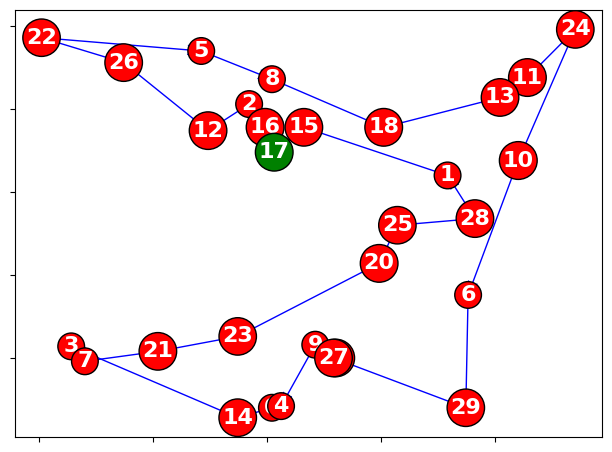

In [ ]:
# get the best state from GA with the max fitness
best_it = ga_hp_mean.iloc[ga_hp_mean['Fitness'].idxmax()]
ordered_state = literal_eval(best_it['State'])

from util.utils import show_TSP_map

show_TSP_map(problem_hard, ordered_state)


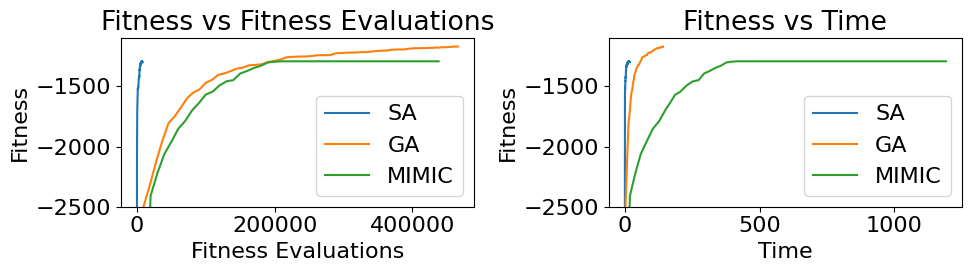

In [ ]:



# before plotting, add padding to the dataframes to make them the same length
# max_fevals = max(best_RHC_run['FEvals'].max(), best_SA_run['FEvals'].max(), best_GA_run['FEvals'].max(), best_MIMIC_run['FEvals'].max())
# best_RHC_run = pd.concat([best_RHC_run, pd.DataFrame({'FEvals': np.arange(best_RHC_run['FEvals'].max(), max_fevals+1, 1)})]).fillna(method='ffill')
# best_SA_run = pd.concat([best_SA_run, pd.DataFrame({'FEvals': np.arange(best_SA_run['FEvals'].max(), max_fevals+1, 1)})]).fillna(method='ffill')
# best_GA_run = pd.concat([best_GA_run, pd.DataFrame({'FEvals': np.arange(best_GA_run['FEvals'].max(), max_fevals+1, 1)})]).fillna(method='ffill')
# best_MIMIC_run = pd.concat([best_MIMIC_run, pd.DataFrame({'FEvals': np.arange(best_MIMIC_run['FEvals'].max(), max_fevals+1, 1)})]).fillna(method='ffill')

# plot the fitness vs the fevals and fitness vs time for each algorithm using the best run in a single subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))

ax1.plot(best_SA_run['FEvals'], best_SA_run['Fitness'], label='SA')
ax1.plot(best_GA_run['FEvals'], best_GA_run['Fitness'], label='GA')
ax1.plot(best_MIMIC_run['FEvals'], best_MIMIC_run['Fitness'], label='MIMIC')
ax1.set_xlabel('Fitness Evaluations')
ax1.set_ylabel('Fitness')
ax1.set_title('Fitness vs Fitness Evaluations')
ax1.set_ylim(-2500, -1100)
ax1.legend()

ax2.plot(best_SA_run['Time'], best_SA_run['Fitness'], label='SA')
ax2.plot(best_GA_run['Time'], best_GA_run['Fitness'], label='GA')
ax2.plot(best_MIMIC_run['Time'], best_MIMIC_run['Fitness'], label='MIMIC')
ax2.set_xlabel('Time')
ax2.set_ylabel('Fitness')
ax2.set_title('Fitness vs Time')
ax2.set_ylim(-2500, -1100)
ax2.legend()experiments/4PEAKS

plt.tight_layout()
plt.savefig('figures/TSP_best_runs_comparison.pdf')
plt.show()


<Figure size 640x480 with 0 Axes>

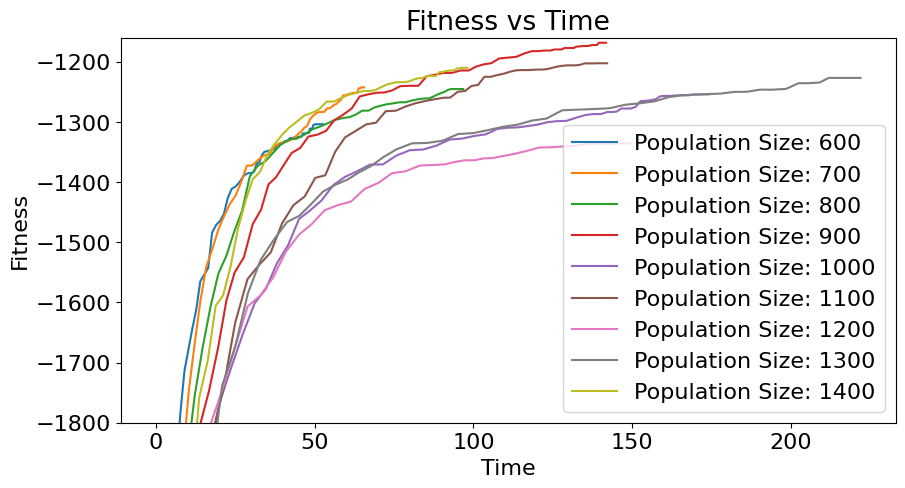

In [ ]:
# Using ga_hp_mean, plot the fitness vs time with different curve for each population size
plt.figure()
plt.figure(figsize=(10, 5))
for pop in ga_hp_mean['Population Size'].unique():
    pop_size = ga_hp_mean[(ga_hp_mean['Population Size'] == pop) & (ga_hp_mean['Mutation Rate'] == GA_HP['Mutation Rate'])]
    plt.plot(pop_size['Time'], pop_size['Fitness'], label=f'Population Size: {pop}')
plt.xlabel('Time')
plt.ylabel('Fitness')
plt.title('Fitness vs Time')
plt.ylim(-1800, -1160)
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

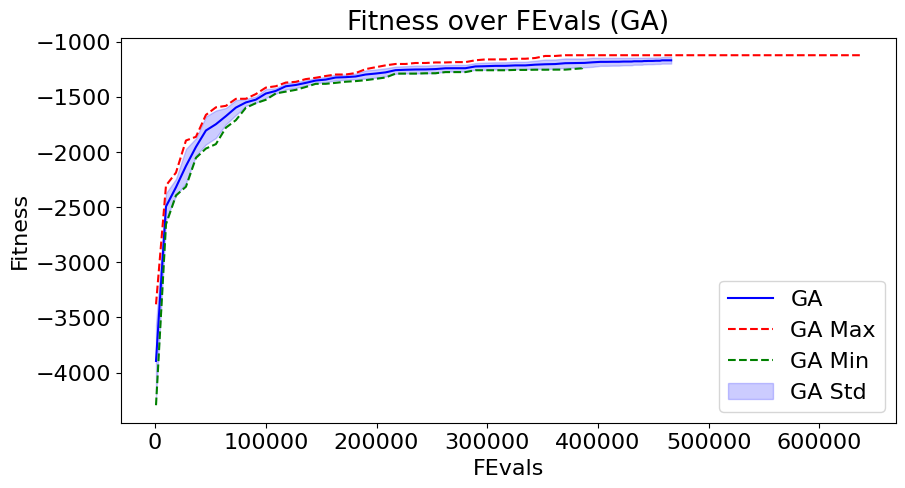

In [ ]:
plot_fitness_iteration(best_GA_run, best_GA_run_std, best_GA_run_min, best_GA_run_max, "GA", "TSP", x_axis="FEvals")

# 5. VIsualization for report

In [ ]:
import pickle
# load the results from the experiments
with open('experiments/TSP_BEST_RUN/TSP_RHC.pkl', 'rb') as f:
    rhc_results = pickle.load(f)

with open('experiments/TSP_BEST_RUN/TSP_SA.pkl', 'rb') as f:
    sa_results = pickle.load(f)

with open('experiments/TSP_BEST_RUN/TSP_GA.pkl', 'rb') as f:
    ga_results = pickle.load(f)

with open('experiments/TSP_BEST_RUN/TSP_MIMIC.pkl', 'rb') as f:
    mmc_results = pickle.load(f)

# get the mean, std, min and max from the results
rhc_mean, rhc_std, rhc_min, rhc_max = runner_results_to_stats(rhc_results)
sa_hp_mean, sa_hp_std, sa_hp_min, sa_hp_max = runner_results_to_stats(sa_results)
ga_hp_mean, ga_hp_std, ga_hp_min, ga_hp_max = runner_results_to_stats(ga_results)
mmc_hp_mean, mmc_hp_std, mmc_hp_min, mmc_hp_max = runner_results_to_stats(mmc_results)

# For each algorithm, get the best run based on the max fitness and hyperparameters
SA_HP = get_optimal_hyperparameters(sa_hp_mean, ['schedule_init_temp', 'schedule_type'])
GA_HP = get_optimal_hyperparameters(ga_hp_mean, ['Population Size', 'Mutation Rate'])
MIMIC_HP = get_optimal_hyperparameters(mmc_hp_mean, ['Population Size', 'Keep Percent'])

schedule_type


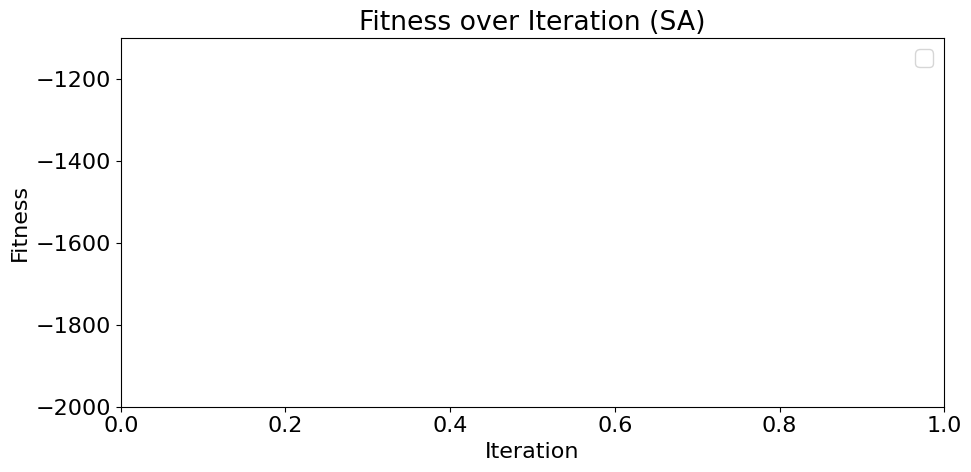

schedule_init_temp


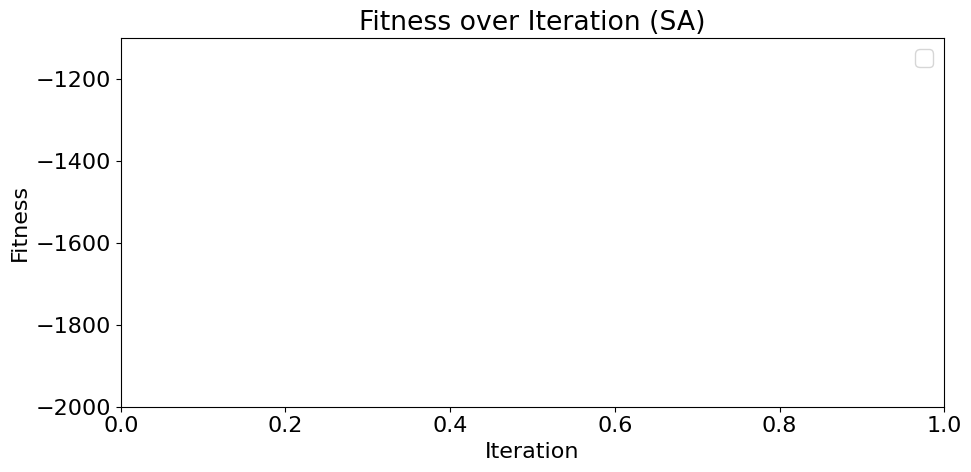

In [ ]:
for key in SA_HP.keys():
    plot_fitness_vs_hyperparameter(sa_hp_mean, sa_hp_std, sa_optimal_HP, key, "SA", "TSP", show_std=False)